# Fantasy Football

In [1]:
#Including libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import xlrd
import math

from matplotlib import rcParams

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows',2000)

#these colors come from colorbrewer2.org. Each is an RGB triplet
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#Reading Data
prices = pd.read_excel('Fantasy Football - DataSet.xlsx',sheetname='FPL Player Prices')
data_2013 = pd.read_excel('Fantasy Football - DataSet.xlsx',sheetname='FPL Player Stats 2013-14')
data_2014 = pd.read_excel('Fantasy Football - DataSet.xlsx',sheetname='FPL Player Stats 2014-15')
data_2015 = pd.read_excel('Fantasy Football - DataSet.xlsx',sheetname='FPL Player Stats 2015-16')

In [3]:
#Removing Missing Values
prices['FirstName'].fillna('-',inplace=True)

In [4]:
for i in range(1,115,1):
    prices[str(i)] = 0

In [5]:
#Finding all teams
teams = prices['Team'].unique()
for i,v in enumerate(teams):
    teams[i] = v.encode('ascii','ignore')

In [6]:
prices['Cost'] = prices['Cost']/1000000.0 #Bringing cost to millions

In [7]:
#Combining data from all three years into one after appending year to each sheet
data_2013['Year'] = 2013
data_2014['Year'] = 2014
data_2015['Year'] = 2015
points = pd.concat([data_2013,data_2014,data_2015])
points = points.reset_index(drop=True)

In [8]:
prices['ID'] = 0 #This will be the unique identifier between 'points' and 'prices'
points['ID'] = 0
i = 1
for index,row in prices.iterrows():
    prices.set_value(index,'ID',i)
    i = i + 1

In [9]:
teams2013 = points[points['Year']==2013]['Team'].unique()
for i,v in enumerate(teams2013):
    teams2013[i] = v.encode('ascii','ignore')
teams2014 = points[points['Year']==2014]['Team'].unique()
for i,v in enumerate(teams2014):
    teams2013[i] = v.encode('ascii','ignore')
teams2015 = points[points['Year']==2015]['Team'].unique()
for i,v in enumerate(teams2015):
    teams2013[i] = v.encode('ascii','ignore')

In [10]:
#Teams which have played all 3 seasons
teams3 = []
for i in teams2015:
    if(i in teams2013 and i in teams2014 and i in teams):
        teams3.append(i)

# Arsenal 

In [11]:
sur = ['Xhaka','Mustafi','Iwobi','Holding','Gnabry','Elneny','Asano'] #ARS
for index,row in prices.iterrows():
    if(row['Surname'] in sur and row['Team']=='ARS'):
        prices.drop(index,inplace=True)

In [12]:
ars = prices[prices['Team']=='ARS']['Surname']
po = [50,86,428,437,480]
for i in po:
    ars.pop(i)

In [13]:
ars_dic = {}
for i in ars:
    for index,row in prices.iterrows():
        if(row['Team']=='ARS' and row['Surname']==i):
            ars_dic[row['Surname'].encode('ascii','ignore')] = row['ID']

In [14]:
c = 0
for i in ars_dic:
    print i
    for index,row in points.iterrows():
        if(row['Name']==i):
            if(row['ID']==0):
                points.set_value(index,'ID',ars_dic[i])
            else:
                print row

Walcott
Cazorla
Giroud
Ospina
Gabriel
Mertesacker
Akpom
Sanogo
Monreal
Ramsey
Gibbs
Debuchy
Jenkinson
Cech
Coquelin
Koscielny
Chamberlain
Welbeck


In [15]:
for index,row in points.iterrows(): #Campbell
    if(row['Name']=='Campbell' and row['PID']==28):
        if(row['ID']==0):
            points.set_value(index,'ID',87)
        else:
            print row

In [16]:
for index,row in points.iterrows(): #Bellerin
    if(row['Team']=='ARS' and row['PID']==9):
        if(row['ID']==0):
            points.set_value(index,'ID',51)
        else:
            print row

In [17]:
for index,row in points.iterrows(): #Ozil
    if(row['Team']=='ARS' and row['PID']==578 and row['Year']==2013):
        if(row['ID']==0):
            points.set_value(index,'ID',429)
        else:
            print row
    if(row['Team']=='ARS' and row['PID']==21 and row['Year']==2014):
        if(row['ID']==0):
            points.set_value(index,'ID',429)
        else:
            print row
    if(row['Team']=='ARS' and row['PID']==21 and row['Year']==2015):
        if(row['ID']==0):
            points.set_value(index,'ID',429)
        else:
            print row

In [18]:
for index,row in points.iterrows(): #Podolski
    if(row['Team']=='ARS' and row['PID']==21 and row['Year']==2013):
        if(row['ID']==0):
            points.set_value(index,'ID',438)
        else:
            print row
    if(row['Team']=='ARS' and row['PID']==24 and row['Year']==2014):
        if(row['ID']==0):
            points.set_value(index,'ID',438)
        else:
            print row
    if(row['Team']=='ARS' and row['PID']==24 and row['Year']==2015):
        if(row['ID']==0):
            points.set_value(index,'ID',438)
        else:
            print row

In [19]:
for index,row in points.iterrows(): #Sanchez
    if(row['Team']=='ARS' and row['PID']==23):
        if(row['ID']==0):
            points.set_value(index,'ID',481)
        else:
            print row

# Manchester United

In [20]:
sur = ['Romero','Varela','Schweinsteiger','Rashford','Pogba','Pereira','Mkhitaryan','Martial','Ibrahimovic','Depay','Darmian','Borthwick-Jackson','Bailly','Fosu-Mensah'] #MUN
for index,row in prices.iterrows():
    if(row['Surname'] in sur and row['Team']=='MUN'):
        prices.drop(index,inplace=True)

In [22]:
mun = prices[prices['Team']=='MUN']['Surname']
po = [566,535,274,138]
for i in po:
    mun.pop(i)

In [23]:
mun_dic = {}
for i in mun:
    for index,row in prices.iterrows():
        if(row['Team']=='MUN' and row['Surname']==i):
            mun_dic[row['Surname'].encode('ascii','ignore')] = row['ID']

In [24]:
c = 0
for i in mun_dic:
    print i
    for index,row in points.iterrows():
        if(row['Name']==i):
            if(row['ID']==0):
                points.set_value(index,'ID',mun_dic[i])
            else:
                print row

Blind
Carrick
Fellaini
Lingard
Shaw
Rojo
Herrera
Young
Schneiderlin
Smalling
Rooney
Mata


In [25]:
for index,row in points.iterrows(): #Wilson
    if(row['Name']=='Wilson' and row['Team']=='MUN'):
        if(row['ID']==0):
            points.set_value(index,'ID',567)
        else:
            print row

In [26]:
for index,row in points.iterrows(): #Valencia
    if(row['Name']=='Valencia' and row['Team']=='MUN'):
        if(row['ID']==0):
            points.set_value(index,'ID',536)
        else:
            print row

In [27]:
for index,row in points.iterrows(): #de Gea
    if(row['Name']=='de Gea' and row['Team']=='MUN'):
        if(row['ID']==0):
            points.set_value(index,'ID',139)
        else:
            print row
    if(row['Name']=='De Gea' and row['Team']=='MUN'):
        if(row['ID']==0):
            points.set_value(index,'ID',139)
        else:
            print row

In [28]:
for index,row in points.iterrows(): #Jones
    if(row['Team']=='MUN' and row['PID']==245 and row['Year']==2013):
        if(row['ID']==0):
            points.set_value(index,'ID',275)
        else:
            print row
    if(row['Team']=='MUN' and row['PID']==260 and row['Year']==2014):
        if(row['ID']==0):
            points.set_value(index,'ID',275)
        else:
            print row
    if(row['Team']=='MUN' and row['PID']==260 and row['Year']==2015):
        if(row['ID']==0):
            points.set_value(index,'ID',275)
        else:
            print row

# Chelsea

In [29]:
sur = ['Traore','Miazga','Batshuayi','Baba Rahman','Aina','Pedro'] #CHE
for index,row in prices.iterrows():
    if(row['Surname'] in sur and row['Team']=='CHE'):
        prices.drop(index,inplace=True)

In [30]:
prices = prices.reset_index(drop=True) #Resetting index for deletion of Kante

In [32]:
prices = prices.drop(prices.index[[268]]) #dropping Kante

In [34]:
che = prices[prices['Team']=='CHE']['Surname']
po = [163,515]
for i in po:
    che.pop(i)

In [35]:
che_dic = {}
for i in che:
    for index,row in prices.iterrows():
        if(row['Team']=='CHE' and row['Surname']==i):
            che_dic[row['Surname'].encode('ascii','ignore')] = row['ID']

In [36]:
c = 0
for i in che_dic:
    print i
    for index,row in points.iterrows():
        if(row['Name']==i):
            if(row['ID']==0):
                points.set_value(index,'ID',che_dic[i])
            else:
                print row

Costa
Begovic
Mikel
Loftus-Cheek
Alonso
Oscar
Terry
Zouma
Hazard
Azpilicueta
Cuadrado
David Luiz
Willian
Chalobah
Matic
Moses
Ivanovic
Courtois
Cahill


In [37]:
for index,row in points.iterrows(): #Fabregas
    if(row['Team']=='CHE' and row['PID']==100 and row['Year']>=2014):
        if(row['ID']==0):
            points.set_value(index,'ID',173)
        else:
            print row

In [38]:
for index,row in points.iterrows(): #vanGinkel
    if(row['Name']=='van Ginkel'):
        if(row['ID']==0):
            points.set_value(index,'ID',541)
        else:
            print row

# Manchester City

In [39]:
sur = ['Zinchenko','Otamendi','Maffeo','Iheanacho','Bravo','Angelino','Nolito'] #MCI
for index,row in prices.iterrows():
    if(row['Surname'] in sur and row['Team']=='MCI'):
        prices.drop(index,inplace=True)

In [41]:
mci = prices[prices['Team']=='MCI']['Surname']
po = [6,194,217,458,546] #Remove toure,sane,gundogan,garcia and aguero
for i in po:
    mci.pop(i)

In [42]:
mci_dic = {}
for i in mci:
    for index,row in prices.iterrows():
        if(row['Team']=='MCI' and row['Surname']==i):
            mci_dic[row['Surname'].encode('ascii','ignore')] = row['ID']

In [43]:
c = 0
for i in mci_dic:
    print i
    for index,row in points.iterrows():
        if(row['Name']==i):
            if(row['ID']==0):
                points.set_value(index,'ID',mci_dic[i])
            else:
                print row

Nasri
Sterling
Silva
Kolarov
Kompany
Stones
Mangala
Fernando
Clichy
De Bruyne
Delph
Fernandinho
Caballero
Navas
Hart
Zabaleta
Sagna


In [44]:
prices = prices.reset_index(drop=True) #Resetting index for deletion of Sane, Gundogan and Garcia from "prices"

In [46]:
prices = prices.drop(prices.index[[192,215,451]]) #dropping

In [48]:
for index,row in points.iterrows(): #Aguero
    if(row['Team']=='MCI' and row['PID']==241 and row['Year']==2013):
        if(row['ID']==0):
            points.set_value(index,'ID',7)
        else:
            print row
    if(row['Team']=='MCI' and row['PID']==254 and row['Year']==2014):
        if(row['ID']==0):
            points.set_value(index,'ID',7)
        else:
            print row        
    if(row['Team']=='MCI' and row['PID']==254 and row['Year']==2015):
        if(row['ID']==0):
            points.set_value(index,'ID',7)
        else:
            print row

In [49]:
for index,row in points.iterrows(): #Yaya Toure
    if(row['Team']=='MCI' and row['PID']==232 and row['Year']==2013):
        if(row['ID']==0):
            points.set_value(index,'ID',574)
        else:
            print row
    if(row['Team']=='MCI' and row['PID']==246 and row['Year']==2014):
        if(row['ID']==0):
            points.set_value(index,'ID',574)
        else:
            print row        
    if(row['Team']=='MCI' and row['PID']==246 and row['Year']==2015):
        if(row['ID']==0):
            points.set_value(index,'ID',574)
        else:
            print row

# Liverpool

In [50]:
sur = ['Wijnaldum','Stewart','Sheyi Ojo','Randall','Origi','Matip','Manninger','Klavan','Karius','Grujic','Gomez','Firmino','Ejaria','Chirivella','Brannagan','Alexander-Arnold'] #LIV
for index,row in prices.iterrows():
    if(row['Surname'] in sur and row['Team']=='LIV'):
        prices.drop(index,inplace=True)

In [52]:
liv = prices[prices['Team']=='LIV']['Surname']
po = [319,448] #Remove sadio mane and sakho
for i in po:
    liv.pop(i)

In [53]:
liv_dic = {}
for i in liv:
    for index,row in prices.iterrows():
        if(row['Team']=='LIV' and row['Surname']==i):
            liv_dic[row['Surname'].encode('ascii','ignore')] = row['ID']

In [54]:
for i in liv_dic:
    print i
    for index,row in points.iterrows():
        if(row['Name']==i):
            if(row['ID']==0):
                points.set_value(index,'ID',liv_dic[i])
            else:
                print row

Mignolet
Clyne
Lucas
Balotelli
Lovren
Sturridge
Lallana
Milner
Coutinho
Moreno
Can
Ings
Markovic
Henderson


In [56]:
for index,row in points.iterrows(): #Sakho
    if(row['Team']=='LIV' and row['PID']==571 and row['Year']==2013):
        if(row['ID']==0):
            points.set_value(index,'ID',479)
        else:
            print row
    if(row['Team']=='LIV' and row['PID']==211 and row['Year']==2014):
        if(row['ID']==0):
            points.set_value(index,'ID',479)
        else:
            print row        
    if(row['Team']=='LIV' and row['PID']==211 and row['Year']==2015):
        if(row['ID']==0):
            points.set_value(index,'ID',479)
        else:
            print row

In [57]:
for index,row in points.iterrows(): #Sadio Mane
    if(row['Team']=='SOU' and row['PID']==604):
        if(row['ID']==0):
            points.set_value(index,'ID',339)
        else:
            print row

# Tottenham Hotspurs

In [58]:
sur = ['Winks','Wimmer','Son','Onomah','Nkoudo','McGee','Janssen','Carter-Vickers','Alli'] #TOT
for index,row in prices.iterrows():
    if(row['Surname'] in sur and row['Team']=='TOT'):
        prices.drop(index,inplace=True)

In [60]:
tot = prices[prices['Team']=='TOT']['Surname']
po = [83,122,140,377,406]
for i in po:
    tot.pop(i)

In [61]:
prices = prices.reset_index(drop=True) #Resetting index for deletion of N'Jie from "prices"

In [63]:
prices = prices.drop(prices.index[[360]]) #dropping

In [64]:
tot_dic = {}
for i in tot:
    for index,row in prices.iterrows():
        if(row['Team']=='TOT' and row['Surname']==i):
            tot_dic[row['Surname'].encode('ascii','ignore')] = row['ID']

In [65]:
for i in tot_dic:
    print i
    for index,row in points.iterrows():
        if(row['Name']==i):
            points.set_value(index,'ID',tot_dic[i])

Vertonghen
Eriksen
Lloris
Dier
Rose
Kane
Wanyama
Pritchard
Sissoko
Lamela
Alderweireld
Vorm
Walker
Yedlin
Bentaleb
Trippier


In [66]:
for index,row in points.iterrows(): #Carroll
    if(row['Team']=='SWA' and row['Name']=='Carroll'):
        if(row['ID']==0):
            points.set_value(index,'ID',92)
        else:
            print row

In [67]:
for index,row in points.iterrows(): #Davies
    if(row['Team']=='SWA' and row['Name']=='Davies' and row['Year']==2013):
        if(row['ID']==0):
            points.set_value(index,'ID',132)
        else:
            print row
    if(row['Team']=='TOT' and row['Name']=='Davies' and row['Year']==2014):
        if(row['ID']==0):
            points.set_value(index,'ID',132)
        else:
            print row        
    if(row['Team']=='TOT' and row['Name']=='Davies' and row['Year']==2015):
        if(row['ID']==0):
            points.set_value(index,'ID',132)
        else:
            print row

In [70]:
prices = prices.reset_index(drop=True) #Resetting index for deletion of Pau Lopez from "prices"
prices = prices.drop(prices.index[[385]]) #dropping

In [71]:
for index,row in points.iterrows(): #Dembele
    if(row['Team']=='TOT' and row['PID']==432 and row['Year']==2013):
        if(row['ID']==0):
            points.set_value(index,'ID',150)
        else:
            print row
    if(row['Team']=='TOT' and row['PID']==376 and row['Year']==2014):
        if(row['ID']==0):
            points.set_value(index,'ID',150)
        else:
            print row        
    if(row['Team']=='TOT' and row['PID']==376 and row['Year']==2015):
        if(row['ID']==0):
            points.set_value(index,'ID',150)
        else:
            print row

# WestHam United

In [72]:
sur = ['Zaza','Randolph','Payet','Oxford','Ogbonna','Obiang','Nordtveit','Masuaku','Lanzini','Fletcher','Fernandes','Feghouli','Cullen','Calleri','Byram','Ayew','Arbeloa','Antonio'] #WHU
for index,row in prices.iterrows():
    if(row['Surname'] in sur and row['Team']=='WHU'):
        prices.drop(index,inplace=True)

In [74]:
whu = prices[prices['Team']=='WHU']['Surname']
po = [3,79,271,409,425,469]
for i in po:
    whu.pop(i)

In [75]:
whu_dic = {}
for i in whu:
    for index,row in prices.iterrows():
        if(row['Team']=='WHU' and row['Surname']==i):
            whu_dic[row['Surname'].encode('ascii','ignore')] = row['ID']

In [76]:
for i in whu_dic:
    print i
    for index,row in points.iterrows():
        if(row['Name']==i):
            if(row['ID']==0):
                points.set_value(index,'ID',whu_dic[i])
            else:
                print row

Collins
Cresswell
Burke
Noble


In [77]:
for index,row in points.iterrows(): #Sakho
    if(row['Team']=='WHU' and row['Name']=='Sakho'):
        if(row['ID']==0):
            points.set_value(index,'ID',478)
        else:
            print row

In [78]:
for index,row in points.iterrows(): #Reid
    if(row['Team']=='WHU' and row['Name']=='Reid'):
        if(row['ID']==0):
            points.set_value(index,'ID',461)
        else:
            print row

In [79]:
for index,row in points.iterrows(): #Carroll
    if(row['Team']=='WHU' and row['Name']=='Carroll'):
        if(row['ID']==0):
            points.set_value(index,'ID',91)
        else:
            print row

In [82]:
prices = prices.reset_index(drop=True) #Resetting index for deletion of Tore from "prices"
prices = prices.drop(prices.index[[451]]) #dropping

In [83]:
for index,row in points.iterrows(): #Adrian
    if(row['PID']==474 and row['Year']==2013):
        if(row['ID']==0):
            points.set_value(index,'ID',4)
        else:
            print row
    if(row['PID']==498 and row['Year']==2014):
        if(row['ID']==0):
            points.set_value(index,'ID',4)
        else:
            print row        
    if(row['PID']==498 and row['Year']==2015):
        if(row['ID']==0):
            points.set_value(index,'ID',4)
        else:
            print row

In [84]:
for index,row in points.iterrows(): #Kouyate
    if(row['PID']==514 and row['Year']==2014):
        if(row['ID']==0):
            points.set_value(index,'ID',304)
        else:
            print row        
    if(row['PID']==514 and row['Year']==2015):
        if(row['ID']==0):
            points.set_value(index,'ID',304)
        else:
            print row

# Everton

In [85]:
sur = ['Pennington','Niasse','Holgate','Gueye','Funes Mori','Davies',] #EVE
for index,row in prices.iterrows():
    if(row['Surname'] in sur and row['Team']=='EVE'):
        prices.drop(index,inplace=True)

In [87]:
eve = prices[prices['Team']=='EVE']['Surname']
po = [258,316,460,484]
for i in po:
    eve.pop(i)

In [88]:
eve_dic = {}
for i in eve:
    for index,row in prices.iterrows():
        if(row['Team']=='EVE' and row['Surname']==i):
            eve_dic[row['Surname'].encode('ascii','ignore')] = row['ID']

In [89]:
for i in eve_dic:
    print i
    for index,row in points.iterrows():
        if(row['Name']==i):
            if(row['ID']==0):
                points.set_value(index,'ID',eve_dic[i])
            else:
                print row

Oviedo
Lukaku
Lennon
Barry
Jagielka
Barkley
Browning
Stekelenburg
Besic
Baines
Mirallas
Cleverley
Coleman
Gibson
Robles
Bolasie
Deulofeu


In [90]:
for index,row in points.iterrows(): #Williams
    if(row['Team']=='SWA' and row['Name']=='Williams'):
        if(row['ID']==0):
            points.set_value(index,'ID',563)
        else:
            print row

In [91]:
for index,row in points.iterrows(): #Valencia
    if(row['Team']=='WHU' and row['Name']=='Valencia'):
        if(row['ID']==0):
            points.set_value(index,'ID',537)
        else:
            print row

In [92]:
for index,row in points.iterrows(): #McCarthy
    if(row['Team']=='EVE' and row['Name']=='McCarthy'):
        if(row['ID']==0):
            points.set_value(index,'ID',364)
        else:
            print row

In [93]:
for index,row in points.iterrows(): #Kone
    if(row['PID']==144 and row['Year']==2013):
        if(row['ID']==0):
            points.set_value(index,'ID',300)
        else:
            print row  
    if(row['PID']==153 and row['Year']==2014):
        if(row['ID']==0):
            points.set_value(index,'ID',300)
        else:
            print row        
    if(row['PID']==153 and row['Year']==2015):
        if(row['ID']==0):
            points.set_value(index,'ID',300)
        else:
            print row

# Southampton

In [95]:
sur = ['van Dijk','Stephens','Pied','Oriol Romeu','Martina','Clasie','Boufal'] #SOU
for index,row in prices.iterrows():
    if(row['Surname'] in sur and row['Team']=='SOU'):
        prices.drop(index,inplace=True)

In [97]:
sou = prices[prices['Team']=='SOU']['Surname']
po = [80,212,315,114]
for i in po:
    sou.pop(i)

In [98]:
sou_dic = {}
for i in sou:
    for index,row in prices.iterrows():
        if(row['Team']=='SOU' and row['Surname']==i):
            sou_dic[row['Surname'].encode('ascii','ignore')] = row['ID']

In [99]:
for i in sou_dic:
    print i
    for index,row in points.iterrows():
        if(row['Name']==i):
            if(row['ID']==0):
                points.set_value(index,'ID',sou_dic[i])
            else:
                print row

Redmond
Targett
Bertrand
Yoshida
Gardos
Long
Rodriguez
Isgrove
Reed
Tadic
Gazzaniga
Ward-Prowse
Forster
Austin
Fonte


In [100]:
for index,row in points.iterrows(): #McCarthy
    if(row['Name']=='McCarthy' and row['PID']==607):
        if(row['ID']==0):
            points.set_value(index,'ID',363)
        else:
            print row

In [101]:
for index,row in points.iterrows(): #Steven Davis
    if(row['Name']=='Davis' and row['Team']=='SOU'):
        if(row['ID']==0):
            points.set_value(index,'ID',135)
        else:
            print row
    if(row['Name']=='Steven Davis' and row['Team']=='SOU'):
        if(row['ID']==0):
            points.set_value(index,'ID',135)
        else:
            print row

In [104]:
prices = prices.reset_index(drop=True) #Resetting index for deletion of Cedric from "prices"
prices = prices.drop(prices.index[[79,207]]) #dropping

# Swansea City

In [105]:
sur = ['van der Hoorn','Tabanou','Nordfeldt','McBurnie','Mawson','Llorente','Kingsley'] #SWA
for index,row in prices.iterrows():
    if(row['Surname'] in sur and row['Team']=='SWA'):
        prices.drop(index,inplace=True)

In [107]:
swa = prices[prices['Team']=='SWA']['Surname']
po = [36,150,244,434]
for i in po:
    swa.pop(i)

In [108]:
swa_dic = {}
for i in swa:
    for index,row in prices.iterrows():
        if(row['Team']=='SWA' and row['Surname']==i):
            swa_dic[row['Surname'].encode('ascii','ignore')] = row['ID']

In [109]:
for i in swa_dic:
    print i
    for index,row in points.iterrows():
        if(row['Name']==i):
            if(row['ID']==0):
                points.set_value(index,'ID',swa_dic[i])
            else:
                print row

Routledge
Emnes
Sigurdsson
Fabianski
Cork
Naughton
Amat
Fer
Gomis
Dyer
Britton
Rangel
Montero
Fulton
Barrow


In [110]:
for index,row in points.iterrows(): #Taylor
    if(row['Team']=='SWA' and row['Name']=='Taylor'):
        if(row['ID']==0):
            points.set_value(index,'ID',522)
        else:
            print row

In [111]:
for index,row in points.iterrows(): #Ki Sung-Yueng
    if(row['Name']=='Ki Sung-Yueng'):
        if(row['ID']==0):
            points.set_value(index,'ID',291)
        else:
            print row

In [115]:
prices = prices.reset_index(drop=True) #Resetting index for deletion of Borja from "prices"
prices = prices.drop(prices.index[[36]]) #dropping

In [116]:
for index,row in points.iterrows(): #Fernandez
    if(row['PID']==584 and row['Team']=='SWA' and row['Year']>2013):
        if(row['ID']==0):
            points.set_value(index,'ID',179)
        else:
            print row

# Sunderland

In [117]:
sur = ['Stryjek','Ndong','Watmore','Thomas Robson','Pickford','Mika','Matthews','Love','Lens','Kirchhoff','Khazri','Josh Robson','Gooch','Djilobodji','Denayer','Asoro'] #SUN
for index,row in prices.iterrows():
    if(row['Surname'] in sur and row['Team']=='SUN'):
        prices.drop(index,inplace=True)

In [119]:
sun = prices[prices['Team']=='SUN']['Surname']
po = [226,250]
for i in po:
    sun.pop(i)

In [120]:
sun_dic = {}
for i in sun:
    for index,row in prices.iterrows():
        if(row['Team']=='SUN' and row['Surname']==i):
            sun_dic[row['Surname'].encode('ascii','ignore')] = row['ID']

In [121]:
for i in sun_dic:
    print i
    for index,row in points.iterrows():
        if(row['Name']==i):
            if(row['ID']==0):
                points.set_value(index,'ID',sun_dic[i])
            else:
                print row

McNair
van Aanholt
Mannone
Borini
Defoe
Pienaar
Rodwell
Anichebe
Cattermole
Manquillo
O'Shea
Januzaj
Larsson


In [122]:
for index,row in points.iterrows(): #Jones
    if(row['PID']==455 and row['Team']=='WBA' and row['Year']==2013):
        if(row['ID']==0):
            points.set_value(index,'ID',273)
        else:
            print row
    if(row['PID']==428 and row['Team']=='SUN' and row['Year']==2014):
        if(row['ID']==0):
            points.set_value(index,'ID',273)
        else:
            print row
    if(row['PID']==428 and row['Team']=='SUN' and row['Year']==2015):
        if(row['ID']==0):
            points.set_value(index,'ID',273)
        else:
            print row

In [125]:
prices = prices.reset_index(drop=True) #Resetting index for deletion of Kone from "prices"
prices = prices.drop(prices.index[[242]]) #dropping

# Crystal Palace

In [127]:
sur = ['Sako','Mandanda','Ladapo','Kaikai','Jonathan Benteke','Dreher','Boateng','Anderson'] #CRY
for index,row in prices.iterrows():
    if(row['Surname'] in sur and row['Team']=='CRY'):
        prices.drop(index,inplace=True)

In [129]:
cry = prices[prices['Team']=='CRY']['Surname']
po = [66,83,397,445]
for i in po:
    cry.pop(i)

In [130]:
cry_dic = {}
for i in cry:
    for index,row in prices.iterrows():
        if(row['Team']=='CRY' and row['Surname']==i):
            cry_dic[row['Surname'].encode('ascii','ignore')] = row['ID']

In [131]:
for i in cry_dic:
    print i
    for index,row in points.iterrows():
        if(row['Name']==i):                
            if(row['ID']==0):
                points.set_value(index,'ID',cry_dic[i])
            else:
                print row

Zaha
Remy
Mutch
Jedinak
Flamini
Tomkins
Wickham
Puncheon
Speroni
McArthur
Dann
Ledley
Delaney
Kelly
Lee Chung-yong
Ward
Hennessey
Fryers
Townsend
Cabaye


In [133]:
for index,row in points.iterrows(): #Williams
    if(row['Name']=='Williams' and row['Team']=='CRY'):
        if(row['ID']==0):
            points.set_value(index,'ID',564)
        else:
            print row

In [134]:
for index,row in points.iterrows(): #Campbell
    if(row['Name']=='Campbell' and row['ID']==0):
        if(row['ID']==0):
            points.set_value(index,'ID',86)
        else:
            print row

In [135]:
for index,row in points.iterrows(): #Benteke
    if(row['Name']=='Benteke'):
        if(row['ID']==0):
            points.set_value(index,'ID',106)
        else:
            print row

In [137]:
for index,row in points.iterrows(): #Souare
    if(row['PID']==679 and row['Team']=='CRY'):
        if(row['ID']==0):
            points.set_value(index,'ID',504)
        else:
            print row

# West Bromich Albion

In [138]:
sur = ['Wilson','Rose','Robson-Kanu','Nyom','McClean','Leko','Field'] #WBA
for index,row in prices.iterrows():
    if(row['Surname'] in sur and row['Team']=='WBA'):
        prices.drop(index,inplace=True)

In [140]:
wba = prices[prices['Team']=='WBA']['Surname']
po = [109,152,310,331,343,369]
for i in po:
    wba.pop(i)

In [141]:
wba_dic = {}
for i in wba:
    for index,row in prices.iterrows():
        if(row['Team']=='WBA' and row['Surname']==i):
            wba_dic[row['Surname'].encode('ascii','ignore')] = row['ID']

In [142]:
for i in wba_dic:
    print i
    for index,row in points.iterrows():
        if(row['Name']==i):
            if(row['ID']!=0):
                print row
            else:
                points.set_value(index,'ID',wba_dic[i])

Berahino
Evans
Pocognoli
Galloway
Brunt
Yacob
Myhill
Chadli
Foster
Chester
Gardner
McManaman
McAuley
Gamboa
Lambert


In [143]:
for index,row in points.iterrows(): #Phillips
    if(row['Name']=='Phillips' and row['Team']=='QPR'):
        if(row['ID']==0):
            points.set_value(index,'ID',439)
        else:
            print row

In [144]:
for index,row in points.iterrows(): #Olsson
    if(row['Name']=='Olsson' and row['Team']=='WBA'):
        if(row['ID']==0):
            points.set_value(index,'ID',417)
        else:
            print row

In [145]:
for index,row in points.iterrows(): #Morrison
    if(row['Name']=='Morrison' and row['Team']=='WBA'):
        if(row['ID']==0):
            points.set_value(index,'ID',386)
        else:
            print row

In [146]:
for index,row in points.iterrows(): #Fletcher
    if(row['Name']=='Fletcher' and row['Team']=='WBA'):
        if(row['ID']==0):
            points.set_value(index,'ID',188)
        else:
            print row
    if(row['Name']=='Fletcher' and row['Team']=='MUN'):
        if(row['ID']==0):
            points.set_value(index,'ID',188)
        else:
            print row

In [147]:
for index,row in points.iterrows(): #Dawson
    if(row['Name']=='Dawson' and row['Team']=='WBA'):
        if(row['ID']==0):
            points.set_value(index,'ID',136)
        else:
            print row

In [150]:
prices = prices.reset_index(drop=True) #Resetting index for deletion of Rondon from "prices"
prices = prices.drop(prices.index[[356]]) #dropping

# Leicester City

In [152]:
sur = ['Chilwell','Amartey','Fuchs','Gray','Inler','Kapustka','Mendy','Musa','Okazaki','Slimani','Zieler','Benalouane'] #LEI
for index,row in prices.iterrows():
    if(row['Surname'] in sur and row['Team']=='LEI'):
        prices.drop(index,inplace=True)

In [154]:
lei = prices[prices['Team']=='LEI']['Surname']
po = [193]
for i in po:
    lei.pop(i)

In [155]:
lei_dic = {}
for i in lei:
    for index,row in prices.iterrows():
        if(row['Team']=='LEI' and row['Surname']==i):
            lei_dic[row['Surname'].encode('ascii','ignore')] = row['ID']

In [156]:
for i in lei_dic:
    print i
    for index,row in points.iterrows():
        if(row['Name']==i):
            if(row['ID']!=0):
                print row
            else:
                points.set_value(index,'ID',lei_dic[i])

Schlupp
King
Vardy
de Laet
Albrighton
Drinkwater
Schmeichel
Hamer
Ulloa
Huth
Morgan
Mahrez
Wasilewski
Simpson


In [159]:
prices = prices.reset_index(drop=True) #Resetting index for deletion of Luis Hernandez from "prices"
prices = prices.drop(prices.index[[188]]) #dropping

# Stoke City 

In [161]:
sur = ['Sobhi','Shaqiri','Ngoy','Martins Indi','Joselu','Imbula','Haugaard','Grant','Afellay'] #STK
for index,row in prices.iterrows():
    if(row['Surname'] in sur and row['Team']=='STK'):
        prices.drop(index,inplace=True)

In [163]:
stk = prices[prices['Team']=='STK']['Surname']
po = [385,209]
for i in po:
    stk.pop(i)

In [164]:
stk_dic = {}
for i in stk:
    for index,row in prices.iterrows():
        if(row['Team']=='STK' and row['Surname']==i):
            stk_dic[row['Surname'].encode('ascii','ignore')] = row['ID']

In [165]:
for i in stk_dic:
    print i
    for index,row in points.iterrows():
        if(row['Name']==i):
            if(row['ID']!=0):
                print row
            else:
                points.set_value(index,'ID',stk_dic[i])

Bony
Arnautovic
Muniesa
Crouch
Wollscheid
Butland
Shawcross
Given
Bardsley
Adam
Ireland
Pieters
Cameron
Allen
Whelan
Diouf
Bojan
Walters


In [166]:
for index,row in points.iterrows(): #Teixeira
    if(row['Name']=='Teixeira' and row['Team']=='STK'):
        if(row['ID']==0):
            points.set_value(index,'ID',523)
        else:
            print row

In [167]:
for index,row in points.iterrows(): #Johnson
    if(row['Name']=='Johnson' and row['Team']=='LIV'):
        if(row['ID']==0):
            points.set_value(index,'ID',271)
        else:
            print row

Mapping for 15 teams done. :D

# Watford

In [211]:
sur = ['Success','Watson','Pereyra','Paredes','Okaka','Kenedy','Kabasele','Ighalo','Holebas','Hoban','Gomes','Deeney','Cathcart','Britos','Berghuis','Behrami','Anya','Amrabat','Abdi'] #WAT
for index,row in prices.iterrows():
    if(row['Surname'] in sur and row['Team']=='WAT'):
        prices.drop(index,inplace=True)

In [214]:
wat = prices[prices['Team']=='WAT']['Surname']
po = [124,125,175,314,327,378,431,363]
for i in po:
    wat.pop(i)

In [216]:
wat_dic = {}
for i in wat:
    for index,row in prices.iterrows():
        if(row['Team']=='WAT' and row['Surname']==i):
            wat_dic[row['Surname'].encode('ascii','ignore')] = row['ID']

In [217]:
for i in wat_dic:
    print i
    for index,row in points.iterrows():
        if(row['Name']==i):
            if(row['ID']!=0):
                print row
            else:
                points.set_value(index,'ID',wat_dic[i])

Kaboul
Vydra
Mariappa
Janmaat
Capoue
Pantilimon


In [219]:
for index,row in points.iterrows(): #Sinclair
    if(row['Name']=='Sinclair' and row['PID']==699):
        if(row['ID']==0):
            points.set_value(index,'ID',495)
        else:
            print row

In [222]:
for index,row in points.iterrows(): #Guediora
    if(row['PID']==583 and row['Team']=='CRY' and row['Year']==2013):
        if(row['ID']==0):
            points.set_value(index,'ID',227)
        else:
            print row
    if(row['PID']==123 and row['Team']=='CRY' and row['Year']==2014):
        if(row['ID']==0):
            points.set_value(index,'ID',227)
        else:
            print row
    if(row['PID']==123 and row['Team']=='CRY' and row['Year']==2015):
        if(row['ID']==0):
            points.set_value(index,'ID',227)
        else:
            print row

In [225]:
prices = prices.reset_index(drop=True) #Resetting index for deletion of 6 players from "prices"
prices = prices.drop(prices.index[[115,116,291,302,351,402]]) #dropping

# Burnley

In [274]:
sur = ['Pope','Defour','Tarkowski','Robinson','O\'Neill','Long','Hennings','Hendrick','Gudmundsson','Gray','Darikwa','Bamford'] #BUR
for index,row in prices.iterrows():
    if(row['Surname'] in sur and row['Team']=='BUR'):
        prices.drop(index,inplace=True)

In [265]:
bur = prices[prices['Team']=='BUR']['Surname']
po = [194,381]
for i in po:
    bur.pop(i)

In [266]:
bur_dic = {}
for i in bur:
    for index,row in prices.iterrows():
        if(row['Team']=='BUR' and row['Surname']==i):
            bur_dic[row['Surname'].encode('ascii','ignore')] = row['ID']

In [267]:
for i in bur_dic:
    print i
    for index,row in points.iterrows():
        if(row['Name']==i):
            if(row['ID']!=0):
                print row
            else:
                points.set_value(index,'ID',bur_dic[i])

Mee
Defour
Pope
Boyd
Arfield
Barnes
Flanagan
Heaton
Marney
Vokes
Ulvestad
Lafferty
Kightly
Lowton
Keane
Jutkiewicz


In [269]:
for index,row in points.iterrows(): #Ward
    if(row['Name']=='Ward' and row['Team']=='BUR'):
            points.set_value(index,'ID',553)

In [270]:
for index,row in points.iterrows(): #Jones
    if(row['Name']=='Jones' and row['Team']=='BUR'):
        if(row['ID']==0):
            points.set_value(index,'ID',274)
        else:
            print row

# Hull City

In [314]:
sur = ['Weir','Tymon','Olley','Odubajo','Mbokani','Maloney','Luer','Lenihan','Kuciak','Keane','Hinchcliffe','Henriksen','Diomande','Bowen','Clucas','Clackstone'] #HUL
for index,row in prices.iterrows():
    if(row['Surname'] in sur and row['Team']=='HUL'):
        prices.drop(index,inplace=True)

In [318]:
hul = prices[prices['Team']=='HUL']['Surname']
po = [111,175,94,97]
for i in po:
    hul.pop(i)

In [320]:
hul_dic = {}
for i in hul:
    for index,row in prices.iterrows():
        if(row['Team']=='HUL' and row['Surname']==i):
            hul_dic[row['Surname'].encode('ascii','ignore')] = row['ID']

In [321]:
for i in hul_dic:
    print i
    for index,row in points.iterrows():
        if(row['Name']==i):
            if(row['ID']!=0):
                print row
            else:
                points.set_value(index,'ID',hul_dic[i])

Livermore
Maguire
Bruce
Marshall
Snodgrass
Mason
McGregor
Meyler
Huddlestone
Robertson
Jakupovic
Elmohamady


In [322]:
for index,row in points.iterrows(): #Davies
    if(row['Name']=='Davies' and row['Team']=='HUL'):
        if(row['ID']==0):
            points.set_value(index,'ID',133)
        else:
            print row

In [323]:
for index,row in points.iterrows(): #Dawson
    if(row['Name']=='Dawson' and row['ID']==0):
        if(row['ID']==0):
            points.set_value(index,'ID',137)
        else:
            print row

In [329]:
for index,row in points.iterrows(): #Hernandez
    if(row['Team']=='HUL' and row['PID']==594 and row['Year']>2013):
        if(row['ID']==0):
            points.set_value(index,'ID',241)
        else:
            print row

In [331]:
for index,row in points.iterrows(): #Diame
    if(row['Team']=='WHU' and row['PID']==490 and row['Year']==2013):
        if(row['ID']==0):
            points.set_value(index,'ID',154)
        else:
            print row
    if(row['PID']==511 and row['Year']>2013):
        if(row['ID']==0):
            points.set_value(index,'ID',154)
        else:
            print row

# Middlesbrough

In [366]:
sur = ['Stuani','Rhodes','Reach','Nsue','Leadbitter','Konstantopoulos','Gibson','Fry','Friend','Forshaw','Fischer','de Sart','de Roon','De Pena','Clayton','Bernardo','Baptiste','Ayala','Adomah'] #MID
for index,row in prices.iterrows():
    if(row['Surname'] in sur and row['Team']=='MID'):
        prices.drop(index,inplace=True)

In [370]:
mid = prices[prices['Team']=='MID']['Surname']
po = [26,305,361,366]
for i in po:
    mid.pop(i)

In [372]:
mid_dic = {}
for i in mid:
    for index,row in prices.iterrows():
        if(row['Team']=='MID' and row['Surname']==i):
            mid_dic[row['Surname'].encode('ascii','ignore')] = row['ID']

In [373]:
for i in mid_dic:
    print i
    for index,row in points.iterrows():
        if(row['Name']==i):
            if(row['ID']!=0):
                print row
            else:
                points.set_value(index,'ID',mid_dic[i])

Fabio
Guzan
Downing
Chambers
Negredo
Nugent


In [379]:
for index,row in points.iterrows(): #Valdes
    if(row['Team']=='MUN' and row['PID']==654 and row['Year']>2013):
        if(row['ID']==0):
            points.set_value(index,'ID',535)
        else:
            print row

In [381]:
for index,row in points.iterrows(): #Ramirez
    if(row['Team']=='SOU' and row['PID']==339 and row['Year']==2013):
        if(row['ID']==0):
            points.set_value(index,'ID',451)
        else:
            print row
    if(row['PID']==352 and row['Year']>2013):
        if(row['ID']==0):
            points.set_value(index,'ID',451)
        else:
            print row

In [384]:
prices = prices.reset_index(drop=True) #Resetting index for deletion of 2 players from "prices"
prices = prices.drop(prices.index[[22,311]]) #dropping

# Bournemouth

In [424]:
sur = ['Surman','Stanislas','Rantie','Pugh','O\'Kane','Mousset','Mings','MacDonald','King','Hyndman','Gradel','Grabban','Fraser','Francis','Federici','Daniels','Cook','Callum Wilson','Arter','Afobe'] #BOU
for index,row in prices.iterrows():
    if(row['Surname'] in sur and row['Team']=='BOU'):
        prices.drop(index,inplace=True)

In [428]:
prices = prices.reset_index(drop=True) #Resetting index for deletion of Adam Smith from "prices"
prices = prices.drop(prices.index[[273]]) #dropping

In [431]:
bou = prices[prices['Team']=='BOU']['Surname']
po = [3,191]
for i in po:
    bou.pop(i)

In [433]:
bou_dic = {}
for i in bou:
    for index,row in prices.iterrows():
        if(row['Team']=='BOU' and row['Surname']==i):
            bou_dic[row['Surname'].encode('ascii','ignore')] = row['ID']

In [434]:
for i in bou_dic:
    print i
    for index,row in points.iterrows():
        if(row['Name']==i):
            if(row['ID']!=0):
                print row
            else:
                points.set_value(index,'ID',bou_dic[i])

Smith
Gosling
Boruc
Ibe
Wilshere


In [435]:
for index,row in points.iterrows(): #Marc Wilson
    if(row['Team']=='STK' and row['Name']=='Wilson'):
        if(row['ID']==0):
            points.set_value(index,'ID',344)
        else:
            print row

In [438]:
for index,row in points.iterrows(): #Ake
    if(row['Team']=='CHE' and row['PID']==86 and row['Year']==2013):
        if(row['ID']==0):
            points.set_value(index,'ID',9)
        else:
            print row
    if(row['PID']==83 and row['Year']>2013 and row['Team']=='CHE'):
        if(row['ID']==0):
            points.set_value(index,'ID',9)
        else:
            print row

#### End of All Teams.

In [475]:
for index,row in points.iterrows(): #Making all '-'s zero in points_df
    if(str(row['TP ']).isdigit()==False and row['TP ']>0):
        points.set_value(index,'TP ',0)

In [539]:
for i in range(1,115,1): #Initialising the game weeks in prices_df
    prices[str(i)] = '-'

In [543]:
for index,row in points.iterrows(): #Assigning points to players in prices_df
    if(row['ID']!=0):
        for i,r in prices.iterrows():
            if(r['ID']==row['ID']):
                game_week = row['GW2']+(row['Year']-2013)*38
                p = row['TP ']
                prices.set_value(i,str(game_week),p)
                break

In [561]:
prices = prices.reset_index(drop=True) #Making indexes continuous

Now, we will make some new features to find some patterns or trends in the data.

In [551]:
prices['PPM'] = -1.0 #Points_per_match
for index,row in prices.iterrows():
    matches = 0.0
    poo = 0.0
    for i in range(1,115,1):
        if(row[str(i)]!='-'):
            matches = matches + 1
            poo = poo + row[str(i)]
    if(matches==0.0):
        print row
    else:
        prices.set_value(index,'PPM',float(poo/matches))

In [1091]:
prices['Matches_2013'] = 0 #Matches played in 2013, 2014 and 2015
for index,row in prices.iterrows():
    matches = 0
    for i in range(1,39,1):
        if(row[str(i)]!='-'):
            matches = matches + 1
    prices.set_value(index,'Matches_2013',matches)
prices['Matches_2014'] = 0
for index,row in prices.iterrows():
    matches = 0
    for i in range(39,77,1):
        if(row[str(i)]!='-'):
            matches = matches + 1
    prices.set_value(index,'Matches_2014',matches)
prices['Matches_2015'] = 0
for index,row in prices.iterrows():
    matches = 0
    for i in range(77,115,1):
        if(row[str(i)]!='-'):
            matches = matches + 1
    prices.set_value(index,'Matches_2015',matches)

In [1092]:
prices['Points_2013'] = 0 #Points obtained in 2013, 2014 and 2015
for index,row in prices.iterrows():
    poo = 0
    for i in range(1,39,1):
        if(row[str(i)]!='-'):
            poo = poo + row[str(i)]
    prices.set_value(index,'Points_2013',poo)
prices['Points_2014'] = 0
for index,row in prices.iterrows():
    poo = 0
    for i in range(39,77,1):
        if(row[str(i)]!='-'):
            poo = poo + row[str(i)]
    prices.set_value(index,'Points_2014',poo)
prices['Points_2015'] = 0
for index,row in prices.iterrows():
    poo = 0
    for i in range(77,115,1):
        if(row[str(i)]!='-'):
            poo = poo + row[str(i)]
    prices.set_value(index,'Points_2015',poo)

In [1095]:
prices['Matches_2016'] = 0
for index,row in prices.iterrows():
    if(row['Matches_2015']==0):
        if(row['Matches_2014']==0):
            lastmat = row['Matches_2013']
        else:
            lastmat = row['Matches_2014']
    else:
        lastmat = row['Matches_2015']
    prices.set_value(index,'Matches_2016',lastmat)

In [1097]:
prices['Points_2016'] = -1

## ARIMA Modeling

In [838]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA
def iszero(a):
    if(a<10):
        x = '0'+str(a)
    else:
        x = str(a)
    return x
def dat(a):
    m = [31,28,31,30,31,30,31,31,30,31,30,31]
    e1 = 0
    e2 = 0
    i = 0
    while(a!=0):
        if(a>m[i]):
            a = a - m[i]
            i = i + 1
        else:
            break
    return '1999-%s-%s 00:00:00'%(iszero(i+1),iszero(a))

In [616]:
prices[prices['Team']=='LIV'][['FirstName','Surname','Cost','PPM']].sort_values(by='PPM',ascending=False)[:30]

,FirstName,Surname,Cost,PPM
187,Sadio,ManÃ©,9.0,6.850000
280,Daniel,Sturridge,10.0,6.846154
70,Philippe,Coutinho,8.1,5.820000
169,Adam,Lallana,7.1,4.944444
215,Alberto,Moreno,4.7,4.785714
63,Nathaniel,Clyne,5.5,4.768421
209,Simon,Mignolet,5.0,4.644860
134,Jordan,Henderson,6.4,4.641509
193,Lazar,Markovic,5.4,4.500000
16,Mario,Balotelli,6.3,4.300000


In [4231]:
prices

,FirstName,Surname,PositionsList,Team,Cost,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,ID,PPM,Matches_2013,Matches_2014,Matches_2015,Points_2013,Points_2014,Points_2015,Matches_2016,Points_2016,FYI
0,Charlie,Adam,MID,STK,4.8,1,7,3,3,1,1,-,3,1,-,5,10,1,2,1,1,8,5,1,3,7,2,1,15,8,1,1,3,-,-,-,1,1,1,-,-,4,7,1,1,1,-,2,3,8,10,1,1,-,1,1,-,0,-,1,0,1,-,-,-,1,-,1,-,4,3,2,6,6,2,7,10,3,8,3,9,10,9,6,-,2,6,6,3,3,9,-,10,2,-,4,-,4,10,10,-,-,-,8,-,3,-,10,5,5,8,3,10,3,4,4,6,5,2,2,4.224719,31,29,29,109,97,170,29,126,0
1,-,AdriÃ¡n,GLK,WHU,5.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2,2,-,-,10,3,12,6,6,8,3,2,-,3,4,3,2,2,2,3,8,2,3,3,2,2,2,0,7,2,3,2,7,1,6,3,2,3,7,3,2,2,3,7,2,2,4,10,1,2,3,7,8,2,1,16,6,3,2,1,8,4,7,5,4,2,2,6,6,7,8,5,4,5,2,7,2,2,10,5,4,10,2,2,5,2,5,8,8,4,4,4,7,2,2,6,5,6,4,4.336842,19,38,38,83,142,187,38,165,1
2,Sergio,AgÃ¼ero,FWD,MCI,13.0,12,5,2,1,13,-,7,16,8,18,2,15,1,6,6,5,-,-,-,-,-,10,4,-,-,-,-,-,-,-,-,-,-,5,12,2,5,1,6,6,2,6,2,8,7,19,2,8,13,2,7,16,1,-,-,-,-,-,1,1,5,5,11,9,5,2,2,2,2,12,6,6,8,23,5,6,12,15,7,10,10,12,14,12,6,15,10,9,9,6,14,-,-,-,-,-,9,6,12,8,10,12,14,10,14,8,5,13,5,12,15,11,11,15,7,8.215909,22,33,33,156,216,351,33,298,2
3,Nathan,AkÃ©,DEF,BOU,4.4,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,6,-,9,2.666667,1,1,1,1,1,6,1,4,3
4,Chuba,Akpom,FWD,ARS,5.2,-,-,-,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,4,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,7,-,-,5,2,-,-,-,-,-,-,-,-,-,-,-,-,-,-,10,3.000000,1,3,3,1,6,14,3,10,4
5,Marc,Albrighton,MID,LEI,5.3,-,-,-,-,-,-,-,-,-,-,-,-,1,-,1,2,1,2,1,1,-,-,-,1,1,3,-,1,-,4,0,2,4,1,3,4,5,-,-,1,0,-,-,-,-,1,-,-,-,-,3,1,1,-,-,-,-,-,3,-,4,1,-,-,-,-,-,-,1,1,3,13,11,3,3,10,-,7,9,-,-,-,-,9,-,-,-,-,5,8,5,-,-,-,-,-,10,-,6,6,-,-,-,-,-,-,7,6,9,3,6,10,10,4,11,4.113208,19,17,17,38,60,120,17,77,5
6,Toby,Alderweireld,DEF,TOT,6.5,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,6,-,2,2,6,6,6,5,2,1,1,-,2,6,9,2,6,1,-,-,-,-,-,-,-,2,6,2,9,0,1,1,1,2,1,-,-,-,9,-,7,13,12,9,10,5,7,15,8,-,10,11,12,12,15,5,-,-,-,-,-,-,-,5,14,7,12,15,15,14,14,12,13,12,7.096154,0,26,26,0,88,281,26,293,6
7,Joe,Allen,MID,STK,4.8,-,1,-,-,-,-,-,-,1,-,1,1,-,1,2,3,2,2,1,-,-,1,-,1,1,-,1,3,-,6,3,1,-,1,2,2,8,1,1,2,5,-,-,-,-,1,3,3,1,2,3,1,-,1,-,-,-,-,-,-,-,3,-,3,2,3,3,1,2,11,-,2,-,-,-,2,9,2,8,-,-,-,-,5,8,3,7,2,7,9,-,5,-,-,-,-,-,-,-,4,-,3,3,7,8,9,9,8,-,6,-,-,-,8,14,3.553846,23,21,21,46,55,130,21,93,7
8,Marcos,Alonso,DEF,CHE,5.9,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2,1,6,6,1,-,0,-,-,8,-2,0,-1,2,5,7,17,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,16,3.714286,14,0,0,52,0,0,14,67,8
9,Jordi,Amat,DEF,SWA,4.1,-,-,-,-,-,1,1,6,-,-,-,-,-,-,-,2,-,2,-,-,1,0,1,1,-,1,-,1,-,1,-,-,-,2,2,1,2,1,2,6,6,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,1,1,-,2,-,-,-,0,0,-,-,-,-,10,10,2,8,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,8,-,-,2,10,-,7,-,-,-,3,6,-,-,-,-,18,3.000000,17,10,10,26,19,66,10,31,9


In [4230]:
for index,row in prices.iterrows():
    if(index==320):
        prices.set_value(index,'Points_2016',4)

Test Statistic          -4.158148
p-value                  0.000775
#Lags used               0.000000
No. of obser            27.000000
Critical Value (5%)     -2.976430
Critical Value (1%)     -3.699608
Critical Value (10%)    -2.627601
dtype: float64


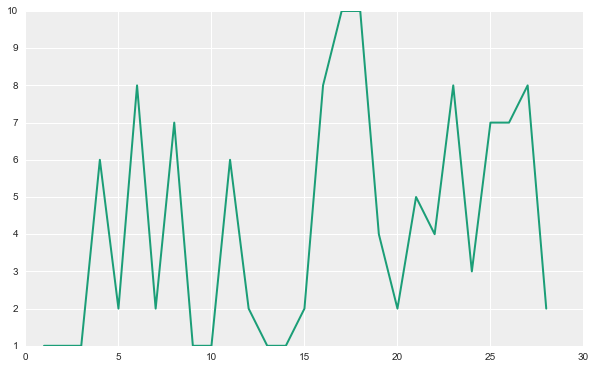

In [4183]:
x = []
y = pd.Series()
z = pd.Series()
for index,row in prices.iterrows():
    if(index==325):
        lastmat= row['Matches_2016']
        joo = 1
        for i in range(1,115,1):
            if(row[str(i)]!='-'):
                jj = dat(joo)
                x.append(joo)
                y.set_value(jj,float(row[str(i)]))
                joo = joo + 1
startd = dat(joo)[:10]
endd = dat(joo+lastmat-1)[:10]
plt.plot(x,y)
dftest = adfuller(y,autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags used','No. of obser'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print dfoutput

In [4184]:
lag_acf = acf(y,nlags=10)
lag_pacf = pacf(y,nlags=10,method='ols')

1


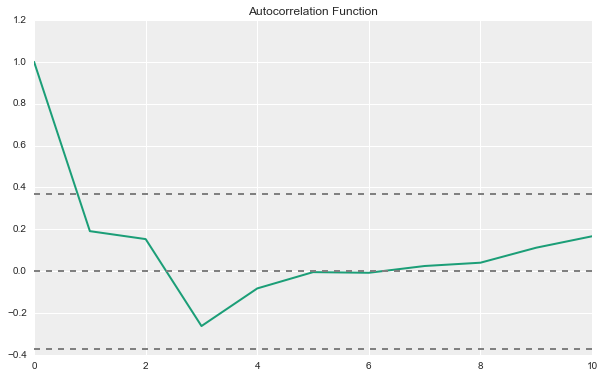

In [4185]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
buf = 1.96/np.sqrt(len(y))
c = 0
for i in lag_acf:
    if(i<buf):
        break
    else:
        c = c + 1
print c

1


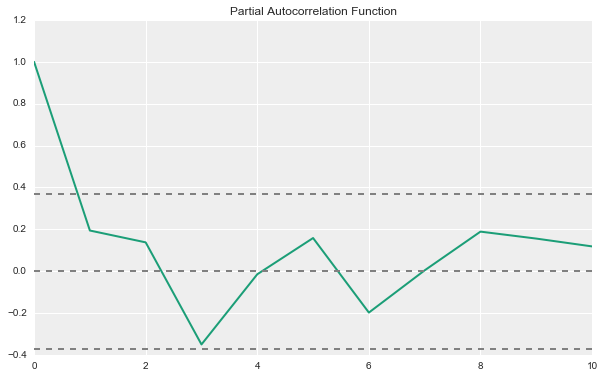

In [4186]:
plt.plot(lag_pacf)
#print lag_pacf,1.96/np.sqrt(len(y))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
buf = 1.96/np.sqrt(len(y))
c = 0
for i in lag_pacf:
    if(i<buf):
        break
    else:
        c = c + 1
print c

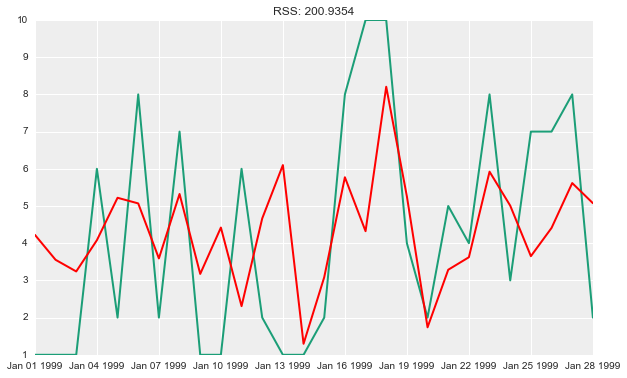

In [4188]:
from statsmodels.tsa.arima_model import ARIMA
y.index = pd.to_datetime(y.index)
model = ARIMA(y,order=(6,0,2))
results_AR = model.fit(disp=-1)
pred = results_AR.predict(start=startd,end=endd)
#print pred
plt.plot(y)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-y)**2))

In [4189]:
tot = len(results_AR.fittedvalues)
inn = tot - (lastmat)
s = 0
for index,er in enumerate(results_AR.fittedvalues):
    if(index>=inn):
        s = s + er
print s
tuu = 0
for i in pred:
    tuu = tuu + i
print tuu

64.9774479417
56.9477870475


In [4190]:
for index,row in prices.iterrows():
    if(index==325):
        prices.set_value(index,'Points_2016',57)

In [4232]:
final = prices[['Matches_2016','Points_2016','ID']]

In [4233]:
final.to_csv('Priceless1.csv',index=False)

In [4234]:
final

,Matches_2016,Points_2016,ID
0,29,126,2
1,38,165,4
2,33,298,7
3,1,4,9
4,3,10,10
5,17,77,11
6,26,293,12
7,21,93,14
8,14,67,16
9,10,31,18


In [4235]:
final_price = pd.read_excel('Fantasy Football - DataSet.xlsx',sheetname='FPL Player Prices')

In [4260]:
final_price['ID'] = 0
i = 1
for index,row in final_price.iterrows():
    final_price.set_value(index,'ID',i)
    i = i + 1
final_price['Points_2016'] = -1.0
final_price['Matches_2016'] = -1.0

In [4261]:
for index,row in final_price.iterrows():
    for i,r in final.iterrows():
        if(row['ID']==r['ID']):
            final_price.set_value(index,'Points_2016',r['Points_2016'])
            final_price.set_value(index,'Matches_2016',r['Matches_2016'])
            break

In [4262]:
final_price['PPM'] = 0.0
for index,row in final_price.iterrows():
    if(row['Matches_2016']!=-1):
        x = row['Points_2016']/float(row['Matches_2016'])
        final_price.set_value(index,'PPM',x)

In [4286]:
final_price.to_csv('Useforlpp.csv',columns=('PositionsList','Cost','ID','Matches_2016','Points_2016','PPM'),index=False)

## Linear Programming for Dream Team

In [1]:
from pulp import *
import pandas as pd

In [ ]:
data = pd.read_csv('Useforlpp.csv')

In [ ]:
data2 = data[data['Matches_2016']!=-1.0]

In [ ]:
prob = LpProblem("Dream_Team",LpMaximize)
players = []
poin = {}
cost = {}
glk = []
fwd = []
mid = []
defe = []
for index,row in data2.iterrows():
    vari = 'x'+str(row['ID'])
    pos = row['PositionsList']
    players.append(vari)
    poin[vari] = row['Points_2016'] #Used in Objective Function
    cost[vari] = row['Cost']/1000000.0 #Dividing by Million
    if(pos=='GLK'):
        glk.append(vari)
    elif(pos=='FWD'):
        fwd.append(vari)
    elif(pos=='MID'):
        mid.append(vari)
    elif(pos=='DEF'):
        defe.append(vari)
x = pulp.LpVariable.dicts('players',players,lowBound=0,upBound=1,cat = pulp.LpInteger)
prob+= sum(poin[i]*x[i] for i in players)
prob+= sum(cost[i]*x[i] for i in players) <= 100.0 #Budget is 100 Million
prob+= sum(x[i] for i in fwd) == 3 #Limit of 3 Strikers
prob+= sum(x[i] for i in glk) == 2 #Limit of 2 Goalies
prob+= sum(x[i] for i in mid) == 5 #Limit of 5 Midfielders
prob+= sum(x[i] for i in defe) == 5 #Limit of 5 Defenders
import time
st = time.clock()
prob.solve()
en = time.clock()
print (en-st)

In [ ]:
print "Status:", LpStatus[prob.status]
final_players = []
for v in prob.variables():
    if(v.varValue==1.0):
        final_players.append(int(v.name[9:]))
print final_players

In [ ]:
print"Maximum Points = ", value(prob.objective)

In [4307]:
f = [110,12,161,173,189,232,234,262,332,375,42,498,54,542,76] #Total Points

c = 0
p = 0
pl = 0
for i in f:
    for index,row in prices.iterrows():
        if(row['ID']==i):
            print row['FirstName'],row['Surname'],row['PositionsList'],row['Team'],row['Points_2016'],row['Matches_2016'],row['PPM']
            c = c + row['Cost']
            p = p + row['Points_2016']
            pl = pl + row['Points_2015']
            uuu = row['Cost']/row['Points_2016']
            print uuu
print c,p,pl

Tom Cleverley MID EVE 227 32 4.10465116279
0.0233480176211
Toby Alderweireld DEF TOT 293 26 7.09615384615
0.0221843003413
Stewart Downing MID MID 200 37 4.6
0.027
Cesc FÃ bregas MID CHE 249 33 7.18181818182
0.0285140562249
Jose Fonte DEF SOU 278 37 5.97272727273
0.0194244604317
Joe Hart GLK MCI 194 36 4.86
0.0273195876289
Eden Hazard MID CHE 275 37 7.32407407407
0.0367272727273
Branislav Ivanovic DEF CHE 302 37 6.38532110092
0.0198675496689
Romelu Lukaku FWD EVE 301 36 6.45098039216
0.0308970099668
Simon Mignolet GLK LIV 176 35 4.64485981308
0.0284090909091
Ross Barkley MID EVE 249 29 5.33333333333
0.0305220883534
Chris Smalling DEF MUN 223 25 6.18666666667
0.0264573991031
Saido Berahino FWD WBA 222 38 4.45794392523
0.0283783783784
Jamie Vardy FWD LEI 293 35 6.55882352941
0.0337883959044
Chris Brunt DEF WBA 236 34 4.89473684211
0.0207627118644
100.0 3718 4352


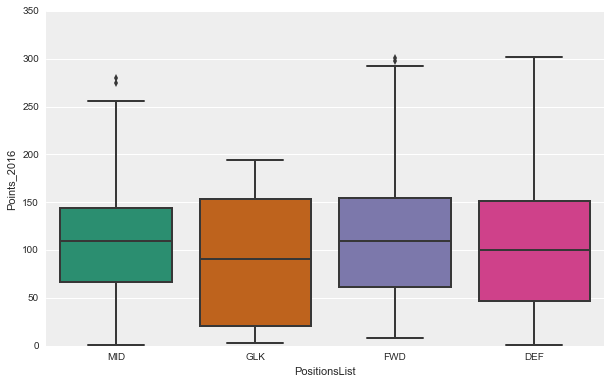

In [4310]:
sns.boxplot(prices['PositionsList'],prices['Points_2016'])

In [4317]:
final_price['CPP'] = 0.0
for index,row in final_price.iterrows():
    x = row['Cost']/(row['Points_2016']*1000000)
    if(row['Matches_2016']==-1.0):
        final_price.set_value(index,'CPP',-1.0)
    else:
        final_price.set_value(index,'CPP',x)

In [4319]:
we = final_price[final_price['CPP']!=-1.0]

In [4322]:
we2= we[we['Matches_2016']>=20]

In [4361]:
mini = np.min(we2['PPM'])
maxi = np.max(we2['PPM'])
mini2 = np.min(we2['CPP'])
maxi2 = np.max(we2['CPP'])
final_price['CPI'] = -1.0
for index,row in final_price.iterrows():
    if(row['Matches_2016']>=20.0):
        x = (row['PPM']-mini)/(maxi-mini)
        y = (row['CPP']-mini2)/(maxi2-mini2        z = x*0.5+(1-y)*0.5
        final_price.set_value(index,'CPI',z)

In [4380]:
for index,row in final_price.iterrows():
    if(row['PPM']==0.0):
        final_price.set_value(index,'PPM',-1.0)

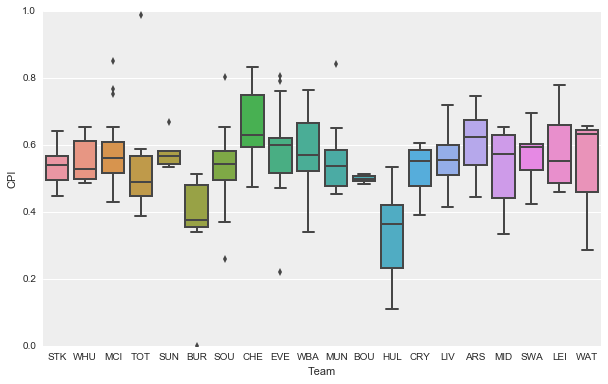

In [4400]:
sns.boxplot(we2['Team'],we2['CPI'])

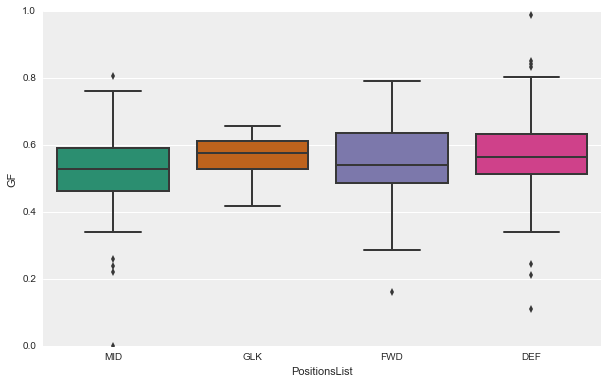

In [4399]:
sns.boxplot(we2['PositionsList'],we2['GF'])

In [4401]:
final_price

,FirstName,Surname,PositionsList,Team,Cost,ID,Points_2016,Matches_2016,PPM,CPP,CPI
0,Almen,Abdi,MID,WAT,5000000,1,-1.0,-1.0,-1.000000,-1.000000,-1.000000
1,Charlie,Adam,MID,STK,4800000,2,126.0,29.0,4.344828,0.038095,0.545950
2,Albert,Adomah,MID,MID,5400000,3,-1.0,-1.0,-1.000000,-1.000000,-1.000000
3,NaN,AdriÃ¡n,GLK,WHU,5000000,4,165.0,38.0,4.342105,0.030303,0.582709
4,Ibrahim,Afellay,MID,STK,5400000,5,-1.0,-1.0,-1.000000,-1.000000,-1.000000
5,Benik,Afobe,FWD,BOU,5700000,6,-1.0,-1.0,-1.000000,-1.000000,-1.000000
6,Sergio,AgÃ¼ero,FWD,MCI,13000000,7,298.0,33.0,9.030303,0.043624,0.767170
7,Ola,Aina,DEF,CHE,4800000,8,-1.0,-1.0,-1.000000,-1.000000,-1.000000
8,Nathan,AkÃ©,DEF,BOU,4400000,9,4.0,1.0,4.000000,1.100000,-1.000000
9,Chuba,Akpom,FWD,ARS,5200000,10,10.0,3.0,3.333333,0.520000,-1.000000
